In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load & Inspect Data


In [3]:
df

,Order_ID,Customer_ID,Age,Gender,City,Loyalty_Member,Product_Category,Product_Name,Quantity,Unit_Price,Payment_Method,Order_Status,Order_Date,Rating
0,1001,C001,23,Female,Mumbai,Yes,Electronics,Wireless Earbuds,1,2999,UPI,Delivered,2024-01-05,4
1,1002,C002,35,Male,Pune,No,Home Decor,Wall Clock,2,899,Credit Card,Delivered,2024-01-07,5
2,1003,C003,29,Female,Bangalore,Yes,Fashion,Women Kurti,1,1499,Debit Card,Cancelled,2024-01-10,2
3,1004,C004,41,Male,Delhi,No,Electronics,Smart Watch,1,4999,Net Banking,Delivered,2024-01-15,4
4,1005,C005,22,Female,Mumbai,Yes,Beauty,Face Serum,3,799,UPI,Returned,2024-01-18,3
5,1006,C006,31,Male,Hyderabad,Yes,Electronics,Bluetooth Speaker,1,2599,Credit Card,Delivered,2024-01-22,5
6,1007,C007,27,Female,Pune,No,Fashion,Men T-Shirt,2,699,UPI,Delivered,2024-01-25,4
7,1008,C008,38,Male,Chennai,Yes,Home Decor,Table Lamp,1,1899,Debit Card,Delivered,2024-01-28,5
8,1009,C009,45,Female,Delhi,No,Beauty,Hair Dryer,1,3499,Credit Card,Cancelled,2024-02-02,1
9,1010,C010,26,Male,Bangalore,Yes,Electronics,Power Bank,2,1299,UPI,Delivered,2024-02-05,4


In [3]:
df = pd.read_csv("ecommerce_orders.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          10 non-null     int64 
 1   Customer_ID       10 non-null     object
 2   Age               10 non-null     int64 
 3   Gender            10 non-null     object
 4   City              10 non-null     object
 5   Loyalty_Member    10 non-null     object
 6   Product_Category  10 non-null     object
 7   Product_Name      10 non-null     object
 8   Quantity          10 non-null     int64 
 9   Unit_Price        10 non-null     int64 
 10  Payment_Method    10 non-null     object
 11  Order_Status      10 non-null     object
 12  Order_Date        10 non-null     object
 13  Rating            10 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 1.2+ KB


Data Cleaning


In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Total_Price'] = df['Quantity'] * df['Unit_Price']
df['Total_Price']

0    2999
1    1798
2    1499
3    4999
4    2397
5    2599
6    1398
7    1899
8    3499
9    2598
Name: Total_Price, dtype: int64

In [5]:
df['Total_Price'] = df['Quantity'] * df['Unit_Price']

In [12]:
df.head()

,Order_ID,Customer_ID,Age,Gender,City,Loyalty_Member,Product_Category,Product_Name,Quantity,Unit_Price,Payment_Method,Order_Status,Order_Date,Rating,Total_Price
0,1001,C001,23,Female,Mumbai,Yes,Electronics,Wireless Earbuds,1,2999,UPI,Delivered,2024-01-05,4,2999
1,1002,C002,35,Male,Pune,No,Home Decor,Wall Clock,2,899,Credit Card,Delivered,2024-01-07,5,1798
2,1003,C003,29,Female,Bangalore,Yes,Fashion,Women Kurti,1,1499,Debit Card,Cancelled,2024-01-10,2,1499
3,1004,C004,41,Male,Delhi,No,Electronics,Smart Watch,1,4999,Net Banking,Delivered,2024-01-15,4,4999
4,1005,C005,22,Female,Mumbai,Yes,Beauty,Face Serum,3,799,UPI,Returned,2024-01-18,3,2397


In [6]:
total_revenue = df[df['Order_Status']=='Delivered']['Total_Price'].sum()
total_revenue


np.int64(18290)

In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
#safely converts dates and sets invalid ones to NaT.


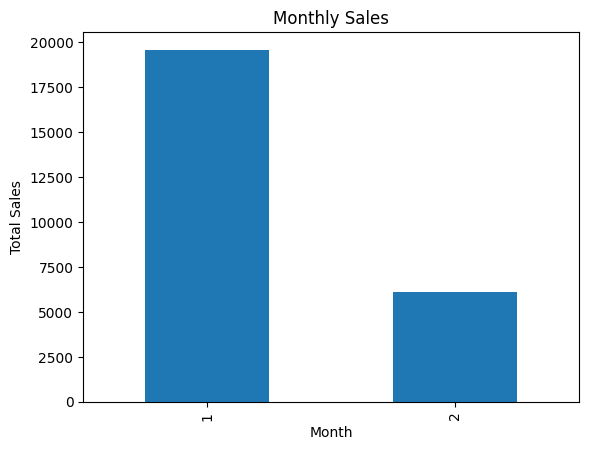

In [9]:
monthly_sales = df.groupby(df['Order_Date'].dt.month)['Total_Price'].sum()

#.dt = Datetime Accessor

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Product Performance

In [10]:
category_sales = df.groupby('Product_Category')['Total_Price'].sum().sort_values(ascending=False)


Customer Behavior Analysis

In [12]:
df.groupby('Loyalty_Member')['Total_Price'].mean()


Loyalty_Member
No     2923.500000
Yes    2331.833333
Name: Total_Price, dtype: float64

Cancellation & Return Analysis

In [14]:
df['Order_Status'].value_counts(normalize=True) * 100


Order_Status
Delivered    70.0
Cancelled    20.0
Returned     10.0
Name: proportion, dtype: float64

Ratings Analysis

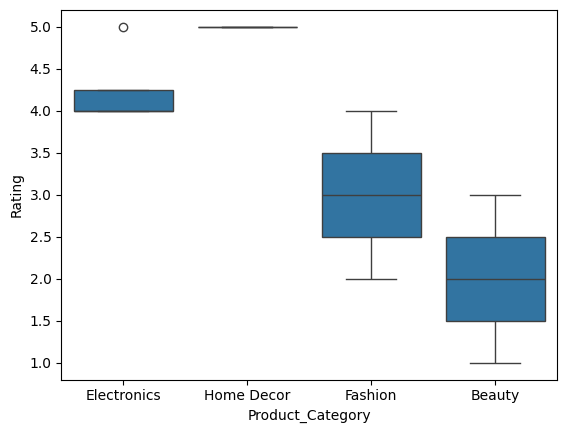

In [15]:
sns.boxplot(x='Product_Category', y='Rating', data=df)
plt.show()
